In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict


In [2]:
def preprocess_data(data,standardize,deg):
  data.sample(frac=1)
  X_train = data[["Strength","Temperature"]][:1155]
  y_train = data["Pressure"][:1155]
  X_test =  data[["Strength","Temperature"]][1155:]
  y_test = data["Pressure"][1155:] 
  if(standardize==1):
      mn = X_train.mean()
      std = X_train.std()
      X_train = (X_train - mn)/std
      X_test = (X_test - mn)/std
      
  elif(standardize==0):
      mini = X_train.min()
      maxi = X_train.max()
      X_train = (X_train - mini)/(maxi-mini)
      X_test = (X_test - mini)/(maxi-mini)
      
 
  xt=pd.DataFrame([])
  xtst = pd.DataFrame([])
  pow = []
  for i in range(deg+1):
    for j in range(deg+1):
      if(i+j <= deg):
        pow.append((i,j))
  idx=0
  for (x,y) in pow:
    r1=((X_train["Strength"]**x)*(X_train["Temperature"]**y))
    r2=((X_test["Strength"]**x)*(X_test["Temperature"]**y))
    xt.insert(idx,"f"+str(x)+str(y),r1,True)
    xtst.insert(idx,"f"+str(x)+str(y),r2,True)
    idx+=1
  return xt,y_train,xtst,y_test,idx

In [3]:
  data = pd.read_csv('/content/FoDS-A1.csv')


In [4]:
import math
def grad_desc(X,Y,Xt,Yt,lr,N,deg):
  X = np.array(X)
  Y = np.array(Y)
  Xt = np.array(Xt)
  Yt = np.array(Yt)
  prev=1e10
  W= np.random.random(N)
  min_e=math.inf
  min_et=math.inf
  for i in range(10000):
    d= ((X@W.T)-Y) 
    dt = ((Xt@W.T)-Yt)
    e = (0.5)*(d@d)
    et = (0.5)*(dt@dt)
    min_e = min(e,min_e)
    min_et = min(et,min_et)
    grad = (X.T@d)
    #if(i%50 == 0):
      #print("Epoch = ",i,"|| train_error = ",e/len(X),"||","test_error = ",et/len(Xt),"||",W)
    W -= lr*(grad/len(X))
    if(abs(prev-e) <= 5e-5):
      print("Breaking out of loop")
      break
    prev=e
  
  print("POLYNOMIAL OF DEGREE : " , deg)

  print("TRAIN ERROR : " , e)
  print("AVG. TRAIN ERROR : " , e/len(X))
  print("TEST ERROR : " , et)
  print("AVG. TEST ERROR : " , et/len(Xt))
  print("MIN. TRAIN ERROR : " , min_e/len(X))
  print("MIN. TEST ERROR : " , min_et/len(Xt))
  print("RMSE TRAIN : " , np.sqrt((2*min_e)/len(X)))
  print("RMSE TEST: " , np.sqrt((2*min_et)/len(Xt)))
  print("Weights : " , W)
  print("==================================================================")
  return e,e/len(X),et,et/len(Xt),min_e/len(X),min_et/len(Xt),W
  
  




  


In [5]:
def sgd(X,Y,Xt,Yt,lr,N,deg):
  X= np.array(X)
  Y = np.array(Y)
  Xt = np.array(Xt)
  Yt = np.array(Yt)
  W = np.random.random(N)
  min_e=math.inf
  min_et=math.inf
  prev=1e10
  for i in range(5000):
    d = ((X@W)-Y)
    dt = ((Xt@W)-Yt)
    if((0.5)*(d@d) == math.inf or (0.5)*(d@d) == math.nan):
      break
    e = (0.5)*(d@d)
    et = (0.5)*(dt@dt)
    min_e = min(e,min_e)
    min_et = min(et,min_et)
    for id in range(len(X)):
      W -= (lr)*(((X[id]@W.T)-Y[id])*X[id])
    #if(i%50==0):
      #print("Epoch = ",i,"|| train_error= ",e,"|| test_error= ",et,"|| ",W)
    if(abs(prev-e) <= 5e-5):
      break
    prev=e
  
  print("POLYNOMIAL OF DEGREE : " , deg)
  print("TRAIN ERROR : " , e)
  print("AVG. TRAIN ERROR : " , e/len(X))
  print("TEST ERROR : " , et)
  print("AVG. TEST ERROR : " , et/len(Xt))
  print("MIN. TRAIN ERROR : " , min_e/len(X))
  print("MIN. TEST ERROR : " , min_et/len(Xt))
  print("RMSE TRAIN : " , np.sqrt((2*min_e)/len(X)))
  print("RMSE TEST: " , np.sqrt((2*min_et)/len(Xt)))

  print("Weights : " , W)
  print("==================================================================")
  return e,e/len(X),et,et/len(Xt),min_e/len(X),min_et/len(Xt),W



In [9]:
w = dict()

In [24]:
mse_tr=[]
mse_tst=[]
degs=[]
result_gd = pd.DataFrame(columns=['Degree','Train Error','Avg Train Error','Test Error','Avg Test Error','Min Avg Train Error','Min Avg Test error','W'])
for deg in range(10):
  X_train,y_train,X_test,y_test,N=preprocess_data(data,0,deg)
  print("FITTING POLYNOMIAL OF DEGREE : " , deg)
  tr,atr,te,ate,mtr,mte,w[deg]=grad_desc(X_train,y_train,X_test,y_test,0.1,N,deg)
  result_gd=result_gd.append({'Degree':deg,'Train Error':tr,'Avg Train Error':atr,'Test Error':te,'Avg Test Error':ate,'Min Avg Train Error':mtr,'Min Avg Test error':mte,'W':w[deg]},ignore_index=True)
  mse_tr.append(mtr)
  mse_tst.append(mte)
  degs.append(deg)


FITTING POLYNOMIAL OF DEGREE :  0
Breaking out of loop
POLYNOMIAL OF DEGREE :  0
TRAIN ERROR :  6662.798459419496
AVG. TRAIN ERROR :  5.768656674822075
TEST ERROR :  2966.12633739118
AVG. TEST ERROR :  5.992174418972081
MIN. TRAIN ERROR :  5.768656674822075
MIN. TEST ERROR :  5.992174418972081
RMSE TRAIN :  3.3966620894113313
RMSE TEST:  3.461841827401154
Weights :  [14.93108412]
FITTING POLYNOMIAL OF DEGREE :  1
Breaking out of loop
POLYNOMIAL OF DEGREE :  1
TRAIN ERROR :  1358.9050023507066
AVG. TRAIN ERROR :  1.1765411275763693
TEST ERROR :  566.997447848546
AVG. TEST ERROR :  1.1454493895930222
MIN. TRAIN ERROR :  1.1765411275763693
MIN. TEST ERROR :  1.145382081333161
RMSE TRAIN :  1.5339759630296488
RMSE TEST:  1.5135270604341113
Weights :  [ 21.00039424  16.09191825 -28.83957041]
FITTING POLYNOMIAL OF DEGREE :  2
POLYNOMIAL OF DEGREE :  2
TRAIN ERROR :  1429.9138925528339
AVG. TRAIN ERROR :  1.2380206861929297
TEST ERROR :  587.9645888256935
AVG. TEST ERROR :  1.187807250152916


In [285]:
X_train,y_train,X_test,y_test,N=preprocess_data(data,0,7)
tr,atr,te,ate,mtr,mte,w[7]=grad_desc(X_train,y_train,X_test,y_test,0.001,N,7)
result_gd=result_gd.append({'Degree':7,'Train Error':tr,'Avg Train Error':atr,'Test Error':te,'Avg Test Error':ate,'Min Avg Train Error':mtr,'Min Avg Test error':mte,'W':w[deg]},ignore_index=True)
mse_tr.append(mtr)
mse_tst.append(mte)
degs.append(7)

POLYNOMIAL OF DEGREE :  7
TRAIN ERROR :  5305.627120021646
AVG. TRAIN ERROR :  4.593616554131295
TEST ERROR :  2349.711882863531
AVG. TEST ERROR :  4.746892692653598
MIN. TRAIN ERROR :  4.593616554131295
MIN. TEST ERROR :  4.746892692653598
RMSE TRAIN :  3.031044887206818
RMSE TEST:  3.0811986929289708
Weights :  [ 1.34312035e+01  2.88081949e+00  1.91839842e+00  3.80945360e-01
  6.73820024e-01  1.83074064e-01  4.97342858e-01  6.08419712e-03
  1.59837127e+00  2.05913217e-01 -2.92881451e-01 -2.13384659e-02
 -4.04963949e-01 -3.05187144e-01 -4.39514886e-01 -1.11900106e+00
 -1.17774489e+00 -1.05807508e+00 -3.10781414e-01 -1.88429130e-01
 -1.97003567e-01 -1.09121674e+00 -6.74580522e-01 -1.12595927e+00
 -7.39703275e-01 -7.75693220e-01 -7.31477818e-01 -6.27424290e-01
 -8.27674940e-01 -1.02534985e-01 -9.47317330e-01 -9.81271759e-01
 -4.86978352e-02 -3.19534705e-01 -6.69420946e-01 -3.03582364e-02]


In [286]:
X_train,y_train,X_test,y_test,N=preprocess_data(data,0,8)
tr,atr,te,ate,mtr,mte,w[8]=grad_desc(X_train,y_train,X_test,y_test,0.001,N,8)
result_gd=result_gd.append({'Degree':8,'Train Error':tr,'Avg Train Error':atr,'Test Error':te,'Avg Test Error':ate,'Min Avg Train Error':mtr,'Min Avg Test error':mte,'W':w[deg]},ignore_index=True)
mse_tr.append(mtr)
mse_tst.append(mte)
degs.append(8)

POLYNOMIAL OF DEGREE :  8
TRAIN ERROR :  5198.728664286451
AVG. TRAIN ERROR :  4.501063778602988
TEST ERROR :  2310.561235183945
AVG. TEST ERROR :  4.667800475119081
MIN. TRAIN ERROR :  4.501063778602988
MIN. TEST ERROR :  4.667800475119081
RMSE TRAIN :  3.000354571914122
RMSE TEST:  3.0554215666971656
Weights :  [13.32657878  3.33382624  1.44219601  0.96061703  0.3208504   0.50832257
  0.32793231  0.44300234  0.13069126  1.50878184 -0.1174103  -0.48784701
 -0.39965742 -0.20656881 -0.235666   -0.16176151  0.17526874 -0.72854721
 -0.96008808 -0.63282276 -0.36462524 -0.2130576  -0.30707533  0.1314283
 -1.0278292  -1.13254554 -0.57728486 -0.79693206 -0.70485638 -0.31682823
 -1.04715502 -1.08360214 -0.64421231 -0.05259386 -0.58689361 -1.2796264
 -0.64572876 -0.698866   -0.44027061 -0.53506163 -0.894962    0.20906529
 -0.21406525 -0.10107189 -0.19738153]


In [287]:
X_train,y_train,X_test,y_test,N=preprocess_data(data,0,9)
tr,atr,te,ate,mtr,mte,w[9]=grad_desc(X_train,y_train,X_test,y_test,0.0001,N,9)
result_gd=result_gd.append({'Degree':9,'Train Error':tr,'Avg Train Error':atr,'Test Error':te,'Avg Test Error':ate,'Min Avg Train Error':mtr,'Min Avg Test error':mte,'W':w[deg]},ignore_index=True)
mse_tr.append(mtr)
mse_tst.append(mte)
degs.append(9)

POLYNOMIAL OF DEGREE :  9
TRAIN ERROR :  25153.959841599826
AVG. TRAIN ERROR :  21.778320209177338
TEST ERROR :  12035.984109031537
AVG. TEST ERROR :  24.315119412184924
MIN. TRAIN ERROR :  21.778320209177338
MIN. TEST ERROR :  24.315119412184924
RMSE TRAIN :  6.599745481331434
RMSE TEST:  6.973538472280041
Weights :  [ 6.68789013  2.44489215  1.11929603  0.29634964  0.419646    0.17381056
  0.45344297  0.63085744 -0.22628159  0.22928262  2.25000677  0.72552366
  0.63815375  0.62741925 -0.15891204 -0.2574776   0.16041124  0.48751849
  0.57907437  1.47175084  0.21819343  0.06785635 -0.05358399 -0.14488712
  0.04904644  0.36022692 -0.3201306   0.39204576  0.44220643  0.01896975
  0.37968022  0.59437715  0.38257088  0.05032004 -0.11904939  0.19116056
  0.52943339  0.26351881 -0.30681393  0.12893599  0.64507673  0.14662485
  0.35024256 -0.23853762  0.2379363   0.10205077  0.71790451  0.45122386
  0.64124279  0.72856215 -0.20171466  0.61211572  0.37158254  0.28573681
  0.30015697]


([<matplotlib.axis.XTick at 0x7f84e4d20550>,
 <a list of 10 Text major ticklabel objects>)

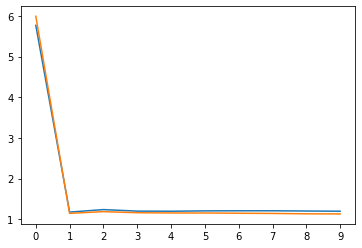

In [25]:
plt.plot(degs,mse_tr)
plt.plot(degs,mse_tst)
plt.xticks(np.arange(0.0,10.0,1.0))


In [26]:
result_gd

,Degree,Train Error,Avg Train Error,Test Error,Avg Test Error,Min Avg Train Error,Min Avg Test error,W
0,0,6662.798459,5.768657,2966.126337,5.992174,5.768657,5.992174,[14.931084116031307]
1,1,1358.905002,1.176541,566.997448,1.145449,1.176541,1.145382,"[21.000394242795583, 16.091918252272432, -28.8..."
2,2,1429.913893,1.238021,587.964589,1.187807,1.238021,1.187807,"[19.931992404677843, 12.438150833655817, 2.379..."
3,3,1386.579788,1.200502,574.692653,1.160995,1.200502,1.160995,"[20.253511718003214, 13.516722904831452, 2.621..."
4,4,1382.738784,1.197176,571.589868,1.154727,1.197176,1.154727,"[20.187109657857967, 13.670957272016443, 3.893..."
5,5,1393.580884,1.206564,571.260021,1.154061,1.206564,1.154061,"[19.986372680187557, 13.251276979817396, 4.103..."
6,6,1396.228584,1.208856,568.499710,1.148484,1.208856,1.148484,"[19.897782756475287, 12.987362324763723, 4.265..."
7,7,1396.515018,1.209104,565.953072,1.143340,1.209104,1.143340,"[19.877362313233863, 12.943696526470369, 3.647..."
8,8,1389.201670,1.202772,561.414845,1.134171,1.202772,1.134171,"[19.92468940172575, 12.805777616298062, 3.6724..."
9,9,1383.773352,1.198072,560.172045,1.131661,1.198072,1.131661,"[19.90548893820907, 13.180896146307406, 3.3774..."


In [12]:
w1=dict()

In [30]:
result_sgd = pd.DataFrame(columns=['Degree','Train Error','Avg Train Error','Test Error','Avg Test Error','Min Avg Train Error','Min Avg Test error','W'])

for deg in range(10):
  X_train,y_train,X_test,y_test,N=preprocess_data(data,0,deg)
  print("FITTING POLYNOMIAL OF DEGREE : " , deg)
  tr,atr,te,ate,mtr,mte,w1[deg]=sgd(X_train,y_train,X_test,y_test,0.1,N,deg)
  result_sgd=result_sgd.append({'Degree':deg,'Train Error':tr,'Avg Train Error':atr,'Test Error':te,'Avg Test Error':ate,'Min Avg Train Error':mtr,'Min Avg Test error':mte,'W':w[deg]},ignore_index=True)


FITTING POLYNOMIAL OF DEGREE :  0
POLYNOMIAL OF DEGREE :  0
TRAIN ERROR :  6688.247328231405
AVG. TRAIN ERROR :  5.790690327473078
TEST ERROR :  2953.276786129141
AVG. TEST ERROR :  5.96621572955382
MIN. TRAIN ERROR :  5.790690327473078
MIN. TEST ERROR :  5.96621572955382
RMSE TRAIN :  3.403142761470073
RMSE TEST:  3.454335168901194
Weights :  [15.14152466]
FITTING POLYNOMIAL OF DEGREE :  1
POLYNOMIAL OF DEGREE :  1
TRAIN ERROR :  1380.4932467286421
AVG. TRAIN ERROR :  1.1952322482499067
TEST ERROR :  585.3562317547073
AVG. TEST ERROR :  1.1825378419287016
MIN. TRAIN ERROR :  1.1948600566140268
MIN. TEST ERROR :  1.1815134806986753
RMSE TRAIN :  1.5458719588724201
RMSE TEST:  1.5372140258914342
Weights :  [ 20.84168813  16.71328238 -28.9679438 ]
FITTING POLYNOMIAL OF DEGREE :  2
POLYNOMIAL OF DEGREE :  2
TRAIN ERROR :  1397.7824837496978
AVG. TRAIN ERROR :  1.210201284631773
TEST ERROR :  602.821725968182
AVG. TEST ERROR :  1.21782166862259
MIN. TRAIN ERROR :  1.210201284631773
MIN. TE

In [31]:
result_sgd

,Degree,Train Error,Avg Train Error,Test Error,Avg Test Error,Min Avg Train Error,Min Avg Test error,W
0,0,6688.247328,5.790690,2953.276786,5.966216,5.790690,5.966216,[14.931084116031307]
1,1,1380.493247,1.195232,585.356232,1.182538,1.194860,1.181513,"[21.000394242795583, 16.091918252272432, -28.8..."
2,2,1397.782484,1.210201,602.821726,1.217822,1.210201,1.217822,"[19.931992404677843, 12.438150833655817, 2.379..."
3,3,1422.895939,1.231945,620.160252,1.252849,1.231945,1.252459,"[20.253511718003214, 13.516722904831452, 2.621..."
4,4,1452.547941,1.257617,636.011746,1.284872,1.254747,1.274993,"[20.187109657857967, 13.670957272016443, 3.893..."
5,5,1453.544200,1.258480,636.623385,1.286108,1.258480,1.277745,"[19.986372680187557, 13.251276979817396, 4.103..."
6,6,1471.847051,1.274326,644.428114,1.301875,1.268199,1.262440,"[19.897782756475287, 12.987362324763723, 4.265..."
7,7,1458.073510,1.262401,631.769054,1.276301,1.256218,1.231353,"[19.877362313233863, 12.943696526470369, 3.647..."
8,8,1477.416540,1.279149,640.108402,1.293148,1.245745,1.231828,"[19.92468940172575, 12.805777616298062, 3.6724..."
9,9,1435.098236,1.242509,600.406613,1.212943,1.242509,1.204766,"[19.90548893820907, 13.180896146307406, 3.3774..."


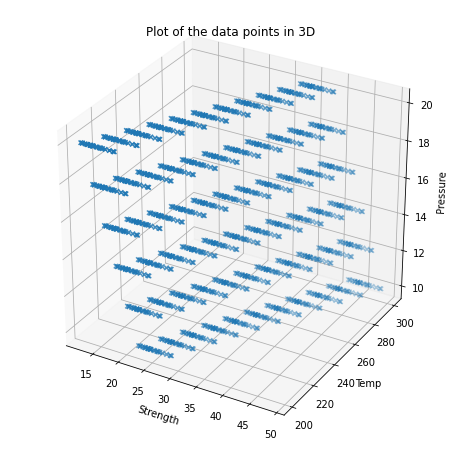

In [32]:
from mpl_toolkits.mplot3d import Axes3D
X,Y = np.array(data["Strength"]),np.array(data["Temperature"])
fig = plt.figure(figsize=(8,8))
Z = np.array(data["Pressure"])
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Z,marker='x')
ax.set_xlabel('Strength') 
ax.set_ylabel('Temp') 
ax.set_zlabel('Pressure')
plt.title('Plot of the data points in 3D')
plt.show()


In [33]:
def polynomial_regression(data,w,deg=0):
  new_data = pd.DataFrame([])
  pow = []
  for i in range(deg+1):
    for j in range(deg+1):
      if(i+j <= deg):
        pow.append((i,j))
  idx=0
  for (x,y) in pow:
    r=((data["Strength"]**x)*(data["Temperature"]**y))
    new_data.insert(idx,"f"+str(x)+str(y),r,True)
    idx+=1
  
  return np.array(new_data@w)



SURFACE PLOT FOR POLYNOMIAL OF DEGREE  0


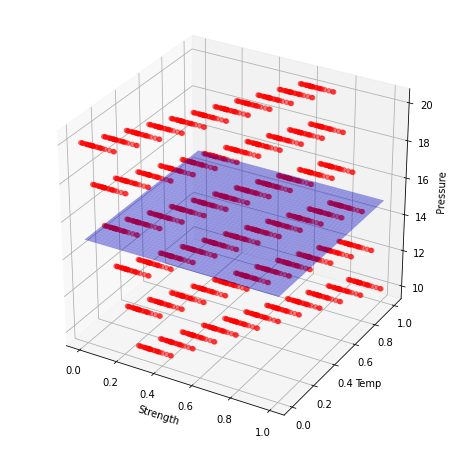

SURFACE PLOT FOR POLYNOMIAL OF DEGREE  1


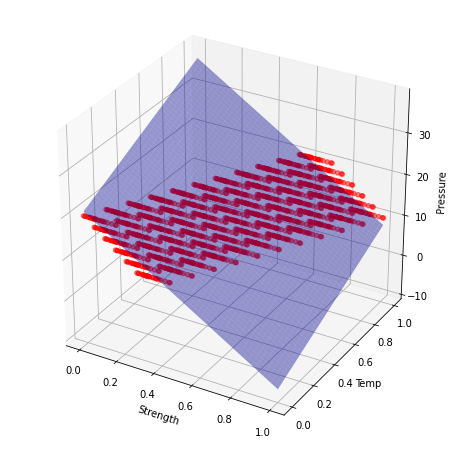

SURFACE PLOT FOR POLYNOMIAL OF DEGREE  2


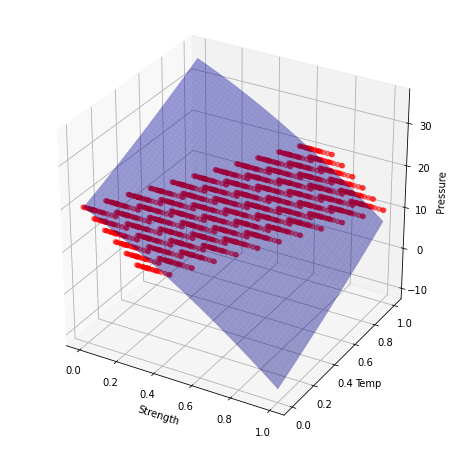

SURFACE PLOT FOR POLYNOMIAL OF DEGREE  3


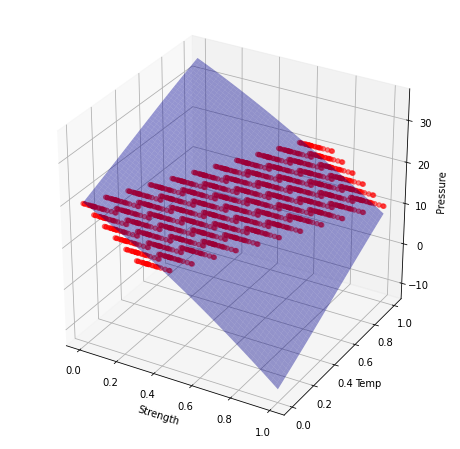

SURFACE PLOT FOR POLYNOMIAL OF DEGREE  4


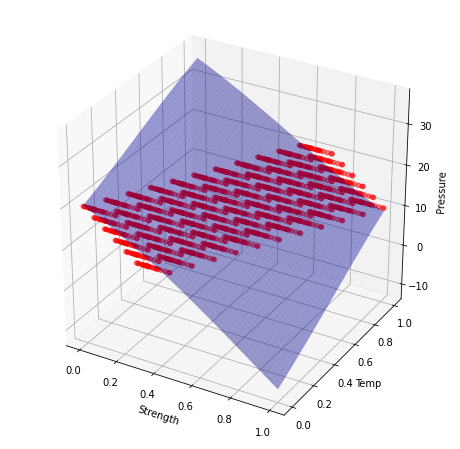

SURFACE PLOT FOR POLYNOMIAL OF DEGREE  5


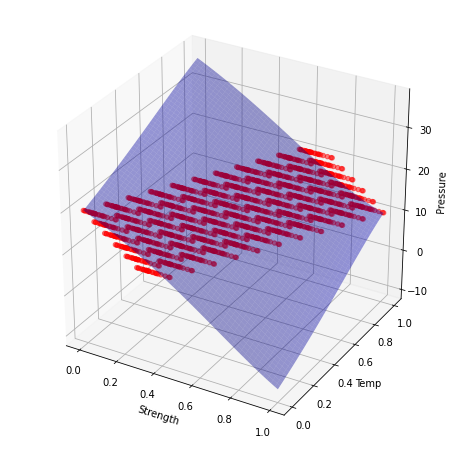

SURFACE PLOT FOR POLYNOMIAL OF DEGREE  6


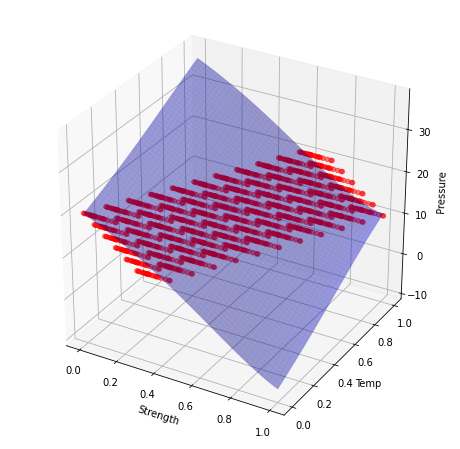

SURFACE PLOT FOR POLYNOMIAL OF DEGREE  7


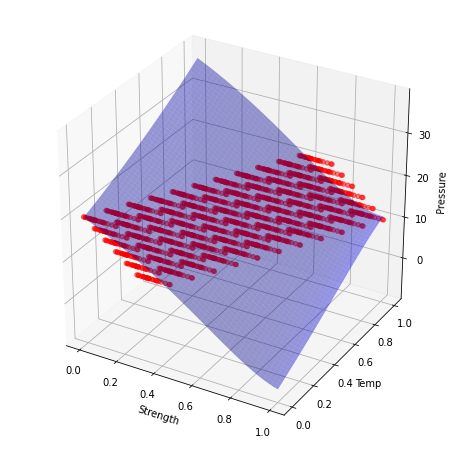

SURFACE PLOT FOR POLYNOMIAL OF DEGREE  8


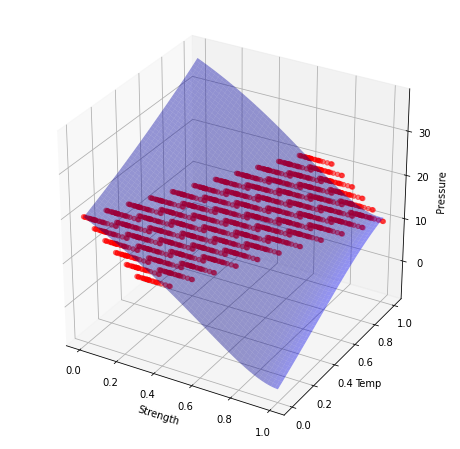

SURFACE PLOT FOR POLYNOMIAL OF DEGREE  9


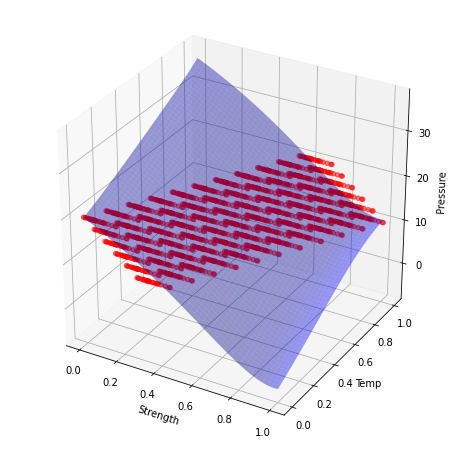

In [34]:
from matplotlib import cm
for d in range(10):
  data1=data
  data1["Strength"]=(data1["Strength"]-data1["Strength"].min())/(data1["Strength"].max()-data1["Strength"].min())
  data1["Temperature"]=(data1["Temperature"]-data1["Temperature"].min())/(data1["Temperature"].max()-data1["Temperature"].min())

  print("SURFACE PLOT FOR POLYNOMIAL OF DEGREE ",d)
  xsurf , ysurf = np.meshgrid(np.linspace(0.0,1.0,200),np.linspace(0.0,1.0,200))
  val = pd.DataFrame({'Strength':xsurf.ravel(),'Temperature':ysurf.ravel()})
  y_fit = polynomial_regression(val,w[d],d)
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111,projection='3d')
  ax.scatter(data1['Strength'],data1['Temperature'],data1["Pressure"],c='red',alpha=0.5)
  ax.plot_surface(xsurf,ysurf,y_fit.reshape(xsurf.shape),color='blue',alpha=0.4)
  ax.set_xlabel('Strength') 
  ax.set_ylabel('Temp') 
  ax.set_zlabel('Pressure')

  plt.show()
  print("==========================================================")



In [19]:
def grad_desc_regularization(X,Y,Xt,Yt,lr,N,deg,type):
  result_reg = pd.DataFrame(columns=['Lambda','Avg Train Error','Avg Test Error','RMSE_Train','RMSE_test'])

  X = np.array(X)
  Y = np.array(Y)
  Xt = np.array(Xt)
  Yt = np.array(Yt)
  rmse_train=[]
  rmse_test = []
  lambdas = np.linspace(0.0,0.001,50)
  for l in lambdas:
    prev=1e10
    W= np.random.random(N)
    for i in range(10000):
      d= ((X@W.T)-Y) 
      dt = ((Xt@W.T)-Yt)
      if((0.5)*(d@d) == math.inf or (0.5)*(d@d) == math.nan):
        break
      if(type==0):
        e = (0.5)*(d@d + l*(sum([abs(wi) for wi in W])))
        et = (0.5)*(dt@dt + l*(sum([abs(wi) for wi in W])))
        sw = np.array([(w/abs(w)) for w in W])
        grad = (X.T@d + (0.5)*(l)*(sw))
      elif(type==1):
        e = (0.5)*(d@d + l*(sum([wi**2 for wi in W])))
        et = (0.5)*(dt@dt + l*(sum([wi**2 for wi in W])))
        grad = (X.T@d + l*W)
    
      W -= lr*(grad/len(X))
      #if(i%50 == 0):
       # print("Lamda: ",l,"||","Epoch = ",i,"|| train_error = ",e/len(X),"||","test_error = ",et/len(Xt),"||",W)
      if(abs(prev-e) <= 5e-5 or math.isnan(e) or math.isnan(et)):
        break
      prev=e

    r2_train = np.sqrt((2*e)/len(X))
    r2_test = np.sqrt((2*et)/len(Xt)) 
    rmse_train.append(r2_train)
    rmse_test.append(r2_test)

    print("Lambda value : " , l)

    print("TRAIN ERROR : " , e)
    print("AVG. TRAIN ERROR : " , e/len(X))
    print("TEST ERROR : " , et)
    print("AVG. TEST ERROR : " , et/len(Xt))
    

    print("==================================================================")
    result_reg=result_reg.append({'Lambda':l,'Avg Train Error':e/len(X),'Avg Test Error':et/len(Xt),'RMSE_Train':r2_train,'RMSE_test':r2_test},ignore_index=True)

 
  
  
  plt.plot(np.log(lambdas),rmse_train)
  plt.plot(np.log(lambdas),rmse_test)

  
  return W,lambdas,result_reg



Lambda value :  0.0
TRAIN ERROR :  1475.3908332560286
AVG. TRAIN ERROR :  1.2773946608277305
TEST ERROR :  589.1434391089226
AVG. TEST ERROR :  1.1901887658766113
Lambda value :  2.0408163265306123e-05
TRAIN ERROR :  1469.1140571700196
AVG. TRAIN ERROR :  1.2719602226580256
TEST ERROR :  586.7889312015768
AVG. TEST ERROR :  1.1854321842456097
Lambda value :  4.0816326530612245e-05
TRAIN ERROR :  1467.5347693059075
AVG. TRAIN ERROR :  1.2705928738579286
TEST ERROR :  586.1592791538956
AVG. TEST ERROR :  1.1841601599068596
Lambda value :  6.122448979591836e-05
TRAIN ERROR :  1474.411968057485
AVG. TRAIN ERROR :  1.276547158491329
TEST ERROR :  589.0603867814033
AVG. TEST ERROR :  1.1900209833967743
Lambda value :  8.163265306122449e-05
TRAIN ERROR :  1472.1866039916756
AVG. TRAIN ERROR :  1.274620436356429
TEST ERROR :  588.1228151564665
AVG. TEST ERROR :  1.1881268993059928
Lambda value :  0.00010204081632653062
TRAIN ERROR :  1470.5419365781888
AVG. TRAIN ERROR :  1.2731964818858779
TE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log


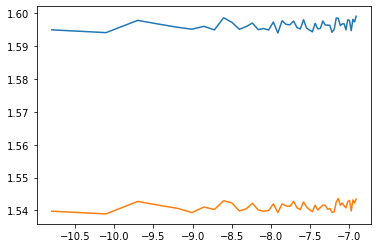

In [32]:
# Gradient Descent with lasso regression
X_train,y_train,X_test,y_test,N = preprocess_data(data,0,9)
w,l,rt=grad_desc_regularization(X_train,y_train,X_test,y_test,0.05,N,9,0)

In [33]:
rt

,Lambda,Avg Train Error,Avg Test Error,RMSE_Train,RMSE_test
0,0.000000,1.277395,1.190189,1.598371,1.542847
1,0.000020,1.271960,1.185432,1.594967,1.539761
2,0.000041,1.270593,1.184160,1.594110,1.538935
3,0.000061,1.276547,1.190021,1.597841,1.542738
4,0.000082,1.274620,1.188127,1.596634,1.541510
5,0.000102,1.273196,1.186755,1.595742,1.540620
6,0.000122,1.272261,1.184799,1.595156,1.539350
7,0.000143,1.273648,1.187371,1.596025,1.541020
8,0.000163,1.271935,1.186238,1.594951,1.540285
9,0.000184,1.277830,1.190365,1.598643,1.542961


Lambda value :  0.0
TRAIN ERROR :  1471.174410149561
AVG. TRAIN ERROR :  1.273744078051568
TEST ERROR :  587.6520700619161
AVG. TEST ERROR :  1.1871758991149821
Lambda value :  2.0408163265306123e-05
TRAIN ERROR :  1471.631901530518
AVG. TRAIN ERROR :  1.274140174485297
TEST ERROR :  587.6493286790965
AVG. TEST ERROR :  1.1871703609678717
Lambda value :  4.0816326530612245e-05
TRAIN ERROR :  1473.129348224982
AVG. TRAIN ERROR :  1.2754366651298545
TEST ERROR :  588.7316552424954
AVG. TEST ERROR :  1.1893568792777685
Lambda value :  6.122448979591836e-05
TRAIN ERROR :  1475.9551447150914
AVG. TRAIN ERROR :  1.2778832421775683
TEST ERROR :  588.499382060416
AVG. TEST ERROR :  1.1888876405260929
Lambda value :  8.163265306122449e-05
TRAIN ERROR :  1474.4235102142327
AVG. TRAIN ERROR :  1.2765571517006344
TEST ERROR :  588.5373763591174
AVG. TEST ERROR :  1.1889643966850856
Lambda value :  0.00010204081632653062
TRAIN ERROR :  1474.9014959012839
AVG. TRAIN ERROR :  1.2769709921223238
TEST 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log


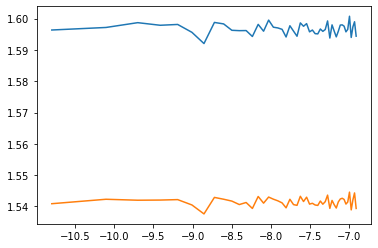

In [34]:
# Gradient Descent with Ridge Regression
w,l,rt=grad_desc_regularization(X_train,y_train,X_test,y_test,0.05,N,9,1)

In [35]:
rt

,Lambda,Avg Train Error,Avg Test Error,RMSE_Train,RMSE_test
0,0.000000,1.273744,1.187176,1.596085,1.540893
1,0.000020,1.274140,1.187170,1.596333,1.540890
2,0.000041,1.275437,1.189357,1.597145,1.542308
3,0.000061,1.277883,1.188888,1.598676,1.542004
4,0.000082,1.276557,1.188964,1.597847,1.542053
5,0.000102,1.276971,1.189185,1.598106,1.542196
6,0.000122,1.272960,1.186556,1.595594,1.540491
7,0.000143,1.267245,1.182155,1.592008,1.537631
8,0.000163,1.278001,1.190268,1.598750,1.542899
9,0.000184,1.277248,1.189376,1.598279,1.542320


In [6]:
def sgd_regularization(X,Y,Xt,Yt,lr,N,deg,type=0):
  result_reg = pd.DataFrame(columns=['Lambda','Avg Train Error','Avg Test Error','RMSE_Train','RMSE_test'])
  X = np.array(X)
  Y = np.array(Y)
  Xt = np.array(Xt)
  Yt = np.array(Yt)
  rmse_train=[]
  rmse_test = []
  lambdas = np.linspace(0.0,0.001,20)
  for l in lambdas:
    prev=1e10
    W= np.random.random(N)
    for i in range(500):
      d= ((X@W.T)-Y) 
      dt = ((Xt@W.T)-Yt)
      if((0.5)*(d@d) == math.inf or (0.5)*(d@d) == math.nan):
        break
      if(type==0):
        e = (0.5)*(d@d + l*(sum([abs(wi) for wi in W])))
        et = (0.5)*(dt@dt + l*(sum([abs(wi) for wi in W])))
        
      elif(type==1):
        e = (0.5)*(d@d + l*(sum([wi**2 for wi in W])))
        et = (0.5)*(dt@dt + l*(sum([wi**2 for wi in W])))
      
      for id in range(len(X)):
        if(type==0):
          sw = np.array([(w/abs(w)) for w in W])
          W -= (lr)*(((X[id]@W.T)-Y[id])*X[id] + l*W)
        elif(type==1):
          W -= (lr)*(((X[id]@W.T)-Y[id])*X[id] + l*W)



      #if(i%50 == 0):
        #print("Lamda: ",l,"||","Epoch = ",i,"|| train_error = ",e/len(X),"||","test_error = ",et/len(Xt),"||",W)
      if(abs(prev-e) <= 5e-5 or math.isnan(e) or math.isnan(et)):
        break
      prev=e

    r2_train = np.sqrt((2*e)/len(X))
    r2_test = np.sqrt((2*et)/len(Xt)) 
    rmse_train.append(r2_train)
    rmse_test.append(r2_test)

    print("Lambda value : " , l)

    print("TRAIN ERROR : " , e)
    print("AVG. TRAIN ERROR : " , e/len(X))
    print("TEST ERROR : " , et)
    print("AVG. TEST ERROR : " , et/len(Xt))

    print("==================================================================")
    result_reg=result_reg.append({'Lambda':l,'Avg Train Error':e/len(X),'Avg Test Error':et/len(Xt),'RMSE_Train':r2_train,'RMSE_test':r2_test},ignore_index=True)

  
 

  
  plt.plot(np.log(lambdas),rmse_train)
  plt.plot(np.log(lambdas),rmse_test)

  
  return W,lambdas,result_reg

Lambda value :  0.0
TRAIN ERROR :  1536.6868308348642
AVG. TRAIN ERROR :  1.330464788601614
TEST ERROR :  675.4424262139179
AVG. TEST ERROR :  1.364530153967511
Lambda value :  5.2631578947368424e-05
TRAIN ERROR :  1518.5681967960008
AVG. TRAIN ERROR :  1.3147776595636371
TEST ERROR :  663.2122772622981
AVG. TEST ERROR :  1.339822782348077
Lambda value :  0.00010526315789473685
TRAIN ERROR :  1517.3952534492107
AVG. TRAIN ERROR :  1.3137621241984507
TEST ERROR :  660.5662062813627
AVG. TEST ERROR :  1.3344771844067933
Lambda value :  0.00015789473684210527
TRAIN ERROR :  1518.2573538793758
AVG. TRAIN ERROR :  1.314508531497295
TEST ERROR :  659.1584179793305
AVG. TEST ERROR :  1.331633167635011
Lambda value :  0.0002105263157894737
TRAIN ERROR :  1519.9437251118452
AVG. TRAIN ERROR :  1.3159685931704288
TEST ERROR :  658.2337052250442
AVG. TEST ERROR :  1.3297650610606955
Lambda value :  0.0002631578947368421
TRAIN ERROR :  1522.4277666527107
AVG. TRAIN ERROR :  1.3181192784871953
TEST

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log


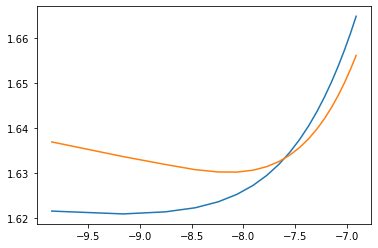

In [30]:
# SGD with lasso regression
X_train,y_train,X_test,y_test,N = preprocess_data(data,0,9)
w,l,rt=sgd_regularization(X_train,y_train,X_test,y_test,0.05,N,9,0)

In [31]:
rt

,Lambda,Avg Train Error,Avg Test Error,RMSE_Train,RMSE_test
0,0.000000,1.330465,1.364530,1.631236,1.651987
1,0.000053,1.314778,1.339823,1.621590,1.636962
2,0.000105,1.313762,1.334477,1.620964,1.633693
3,0.000158,1.314509,1.331633,1.621424,1.631952
4,0.000211,1.315969,1.329765,1.622325,1.630807
5,0.000263,1.318119,1.328917,1.623650,1.630287
6,0.000316,1.320832,1.328881,1.625319,1.630264
7,0.000368,1.324032,1.329551,1.627287,1.630675
8,0.000421,1.327668,1.330847,1.629520,1.631470
9,0.000474,1.331692,1.332695,1.631988,1.632602


Lambda value :  0.0
TRAIN ERROR :  1537.3166630647318
AVG. TRAIN ERROR :  1.3310100978915427
TEST ERROR :  675.8804454857325
AVG. TEST ERROR :  1.365415041385318
Lambda value :  5.2631578947368424e-05
TRAIN ERROR :  1521.8828723898082
AVG. TRAIN ERROR :  1.3176475085626045
TEST ERROR :  665.2747246072378
AVG. TEST ERROR :  1.3439893426408844
Lambda value :  0.00010526315789473685
TRAIN ERROR :  1517.6181641692299
AVG. TRAIN ERROR :  1.3139551204928397
TEST ERROR :  660.7243436586564
AVG. TEST ERROR :  1.3347966538558715
Lambda value :  0.00015789473684210527
TRAIN ERROR :  1518.3643986104867
AVG. TRAIN ERROR :  1.3146012109181702
TEST ERROR :  659.2561995357893
AVG. TEST ERROR :  1.3318307061329075
Lambda value :  0.0002105263157894737
TRAIN ERROR :  1520.0391763725395
AVG. TRAIN ERROR :  1.3160512349545797
TEST ERROR :  658.3372830501971
AVG. TEST ERROR :  1.3299743091923175
Lambda value :  0.0002631578947368421
TRAIN ERROR :  1522.5813733114364
AVG. TRAIN ERROR :  1.3182522712653129


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log


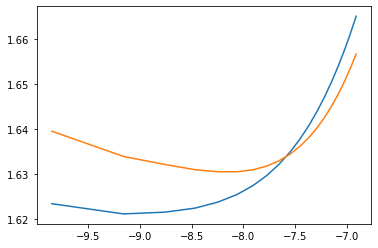

In [27]:
# SGD with ridge regression
w,l,rt=sgd_regularization(X_train,y_train,X_test,y_test,0.05,N,9,1)

In [28]:
rt

,Lambda,Avg Train Error,Avg Test Error,RMSE_Train,RMSE_test
0,0.000000,1.331010,1.365415,1.631570,1.652522
1,0.000053,1.317648,1.343989,1.623359,1.639506
2,0.000105,1.313955,1.334797,1.621083,1.633889
3,0.000158,1.314601,1.331831,1.621482,1.632073
4,0.000211,1.316051,1.329974,1.622376,1.630935
5,0.000263,1.318252,1.329225,1.623732,1.630475
6,0.000316,1.320978,1.329225,1.625409,1.630475
7,0.000368,1.324199,1.329942,1.627390,1.630915
8,0.000421,1.327857,1.331286,1.629636,1.631739
9,0.000474,1.331898,1.333176,1.632114,1.632897
